In [1]:
!pip install wordcloud

In [2]:
#Approach for Data cleansing 
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
#import Python packages that will help us analyzing the data, especially pandas for data analysis and matplotlib for visualization
#WordCloud — The worldcloud library helps us……yes you guessed right, create a word cloud!
#JSON — The json module enables you to convert between JSON and Python Objects
import numpy as np
import re
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime

import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [6]:
#Importing all the CSV files
allcsv=[i for i in glob.glob('*.{}'.format('csv'))]
allcsv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [7]:
#Reading all CSV files

all_dfs = [] # list to store each data frame separately
for csv in allcsv:
    df = pd.read_csv(csv)
    df['country'] = csv[0:2] # adding column 'country' so that each dataset could be identified uniquely
    all_dfs.append(df)
all_dfs[0].head() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [5]:
#Number of rows and columns dataset contains
df.shape

(40949, 17)

In [6]:
#summary of columns and their associated data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [7]:
#Statistical summary of our numerical columns
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [8]:
#Statistical summary of our categorical columns
#Publish Time column with data type : Object
df.describe(include=['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,country
count,40949,40949,40949,40949,40949,40949,40949,40379,40949
unique,6351,205,6455,2207,6269,6055,6352,6901,1
top,j4KvrAUjn6c,17.20.12,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...,US
freq,30,200,30,203,50,1535,30,58,40949


In [9]:
#Fixing Data Types

for df in all_dfs:
    # video_id 
    df['video_id'] = df['video_id'].astype('str') 
    # trending date
    df['trending_date'] = ['20'] + df['trending_date']
    df['trending_date'] = pd.to_datetime(df['trending_date'], format = "%Y.%d.%m")
    #title
    df['title'] = df['title'].astype('str')
    #channel_title
    df['channel_title'] = df['channel_title'].astype('str')
    #category_id
    df['category_id'] = df['category_id'].astype(str) 
    #tags
    df['tags'] = df['tags'].astype('str')
    
    # views, likes, dislikes, comment_count are already in correct data types i.e int64
    
    #thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    #description
    df['description'] = df['description'].astype('str')
    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
    df['comments_disabled'] = df['comments_disabled'].astype('category') 
    df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
    df['video_error_or_removed'] = df['video_error_or_removed'].astype('category') 
    
    # publish_time 
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [10]:
df['publish_time'].head()

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
3   2017-11-13 11:00:04
4   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [11]:
df['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [15]:
all_dfs[1].dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                       object
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
dtype: object

In [18]:
# Changing data type for 'publish_date' from object to 'datetime64[ns]'
for df in all_dfs:
    df.insert(4, 'publish_date', df['publish_time'].dt.date) # loc, column name, values for column to be inserted
    df['publish_time'] = df['publish_time'].dt.time
# Changing data type for 'publish_date' from object to 'datetime64[ns]'
for df in all_dfs:
     df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [19]:
all_dfs[1].dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
publish_date              datetime64[ns]
category_id                       object
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
dtype: object

In [20]:
df.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


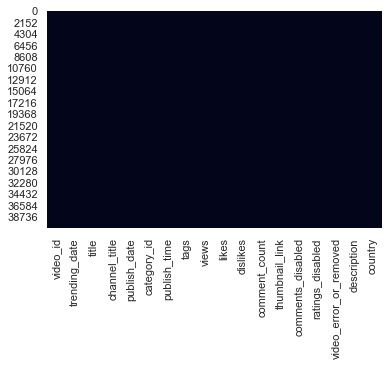

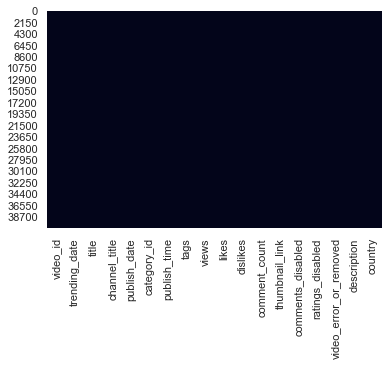

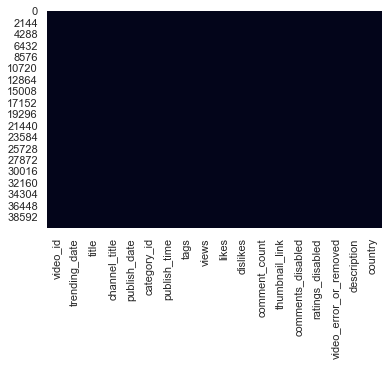

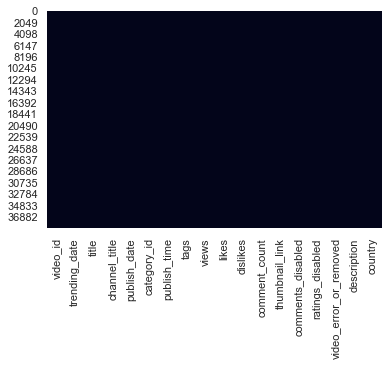

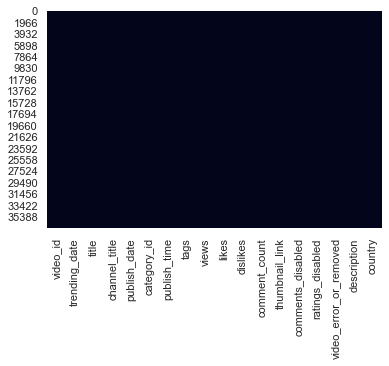

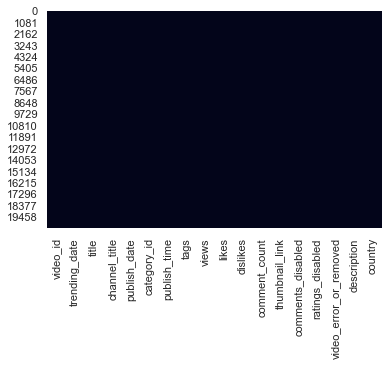

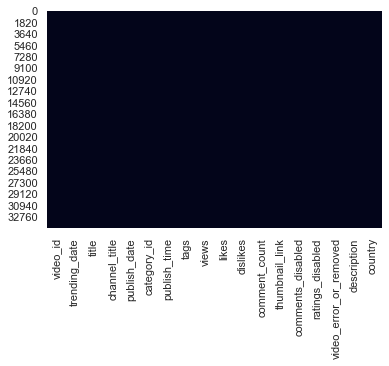

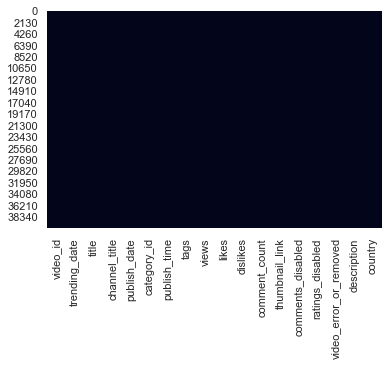

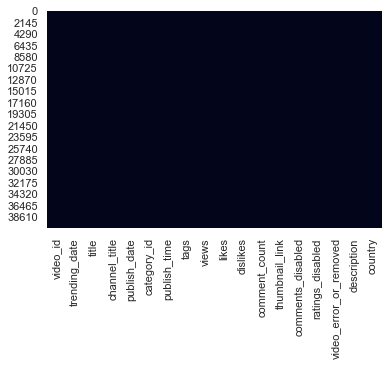

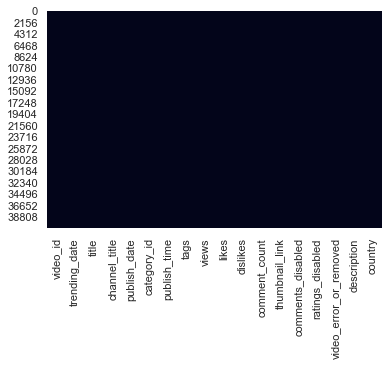

<Figure size 432x288 with 0 Axes>

In [22]:
#Examining Missing Values
for df in all_dfs:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [23]:
#Combining Every Dataframe Into One Huge Dataframe
combined_df = pd.concat(all_dfs)

In [24]:
# Making copy of original dataframe
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Sorting according to latest trending date while removing duplicates
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')
# Doing the same above operation for each of the individual dataframes in the list we created earlier
for df in all_dfs:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
# Printing results
combined_df[['publish_date','publish_time','trending_date', 'country']].head()
# It can be seen that latest publications and trending information is at the top now

,publish_date,publish_time,trending_date,country
video_id,,,,
ooyjaVdt-jA,2018-05-17,17:09:38,2018-06-14,US
NXwn1iUbbJU,2018-06-13,20:13:30,2018-06-14,FR
AN2KspjYRLc,2018-06-12,15:07:36,2018-06-14,FR
WGKOBMZAwuM,2018-06-13,07:00:05,2018-06-14,FR
zauQhWWpa0s,2018-06-13,23:34:13,2018-06-14,FR


In [25]:
#Inserting Category Column 
#One of our final steps for the data cleaning of the data sets was checking the JSON files that were available with the data sets
#Read file
with open('US_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    data = f.read()
# parse file
obj = json.loads(data)
# printing
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [26]:
category_id = {}
with open('DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))
for df in all_dfs:
    df.insert(2, 'category', df['category_id'].map(category_id))
# Printing cleaned combined dataframe
combined_df.head(3)

,index,trending_date,category,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,,,
ooyjaVdt-jA,40948,2018-06-14,Gaming,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,2018-05-17,20,17:09:38,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US
NXwn1iUbbJU,40543,2018-06-14,Entertainment,Série ADJA - Episode 28,Marodi TV Sénégal,2018-06-13,24,20:13:30,"senegal|""video""|""divertissement""|""humour""|""you...",213980,3940,188,801,https://i.ytimg.com/vi/NXwn1iUbbJU/default.jpg,False,False,False,Retrouvez - nous sur http://www.marodi.tv ou t...,FR
AN2KspjYRLc,40551,2018-06-14,Comedy,UN YOUTUBER DANS L'EMISSION LA PLUS GÊNANTE DE...,Chelxie,2018-06-12,23,15:07:36,"youtuber|""skyyart""|""les 12 coeurs""|""emission g...",176036,3673,1625,456,https://i.ytimg.com/vi/AN2KspjYRLc/default.jpg,False,False,False,un youtuber dans une emission génante france l...,FR


In [27]:
combined_df['category'].unique()

array(['Gaming', 'Entertainment', 'Comedy', 'Sports', 'Music',
       'Howto & Style', 'Film & Animation', 'People & Blogs', 'Education',
       'News & Politics', 'Pets & Animals', nan, 'Shows',
       'Travel & Events', 'Autos & Vehicles', 'Science & Technology',
       'Movies', 'Trailers'], dtype=object)

In [28]:
#5.Figure out if there is a correlation between the number of views and the number of likes.
columns_of_interest = ['views', 'likes']
corr_matrix = df[columns_of_interest].corr()
corr_matrix

,views,likes
views,1.000000,0.849177
likes,0.849177,1.000000


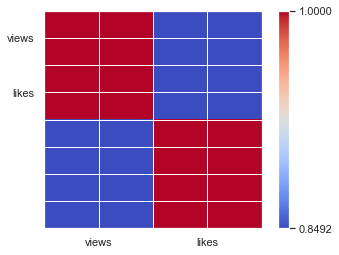

In [29]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)
# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])
# making the labels
labels = ['']
for column in columns_of_interest:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)
plt.show()

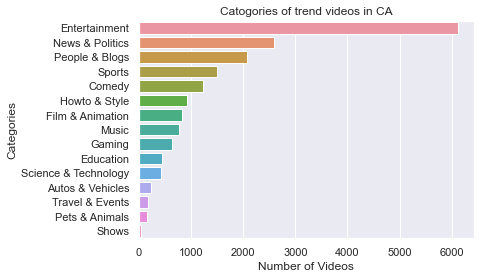

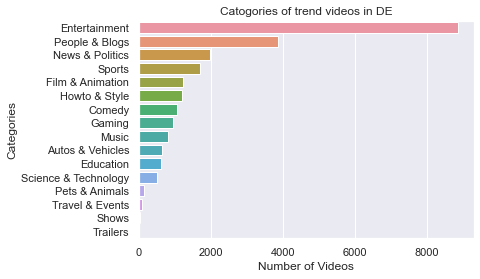

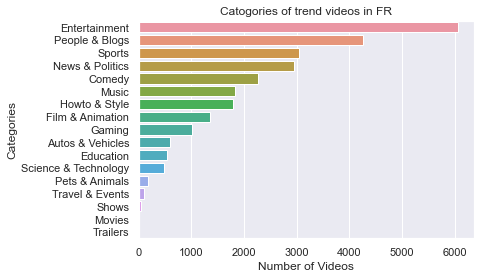

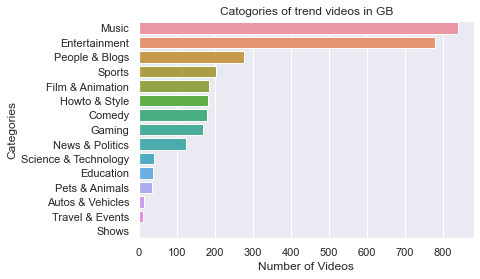

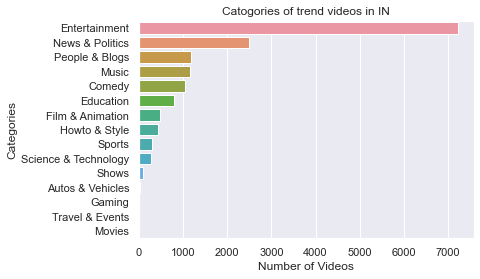

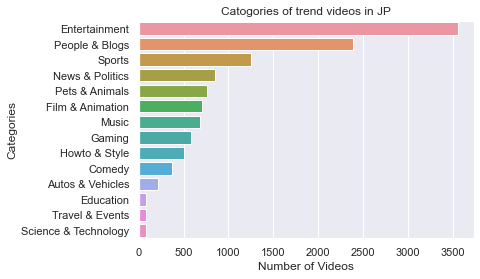

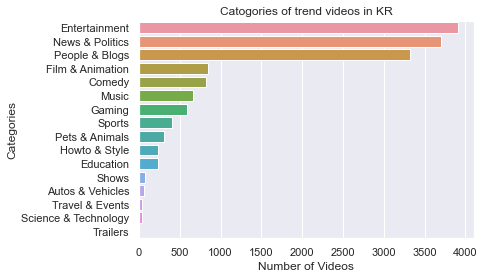

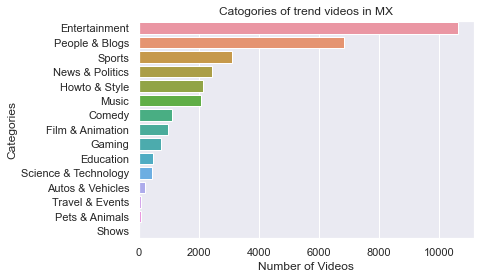

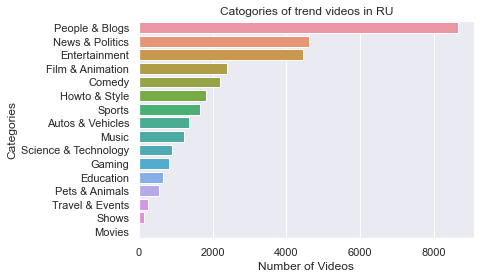

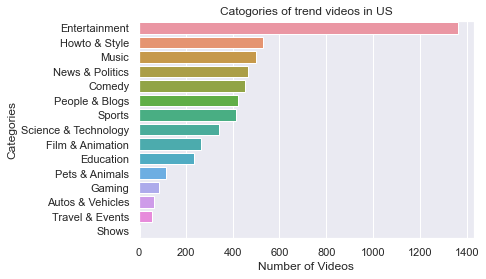

In [30]:
#6.List top trending videos in each category 
# Getting names of all countries
countries = []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[0:2]
    countries.append(c)
for country in countries:
    if country == 'US':
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()

In [35]:
#7.Create a new feature called total_trend_days that just calculates the number of days a video has trended in a new column.
# Calculating days between publish and trending date
temporary = []
for total_trend_days in all_dfs:
    temp = total_trend_days
    temp['total_trend_days'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)
total_trend_days.sort_values(by='total_trend_days',ascending=False).head()

,video_id,trending_date,category,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,total_trend_days
16294,MJO3FmmFuh4,2018-02-05,Entertainment,Budweiser - Original Whazzup? ad,dannotv,2006-07-23,24,08:24:11,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,https://i.ytimg.com/vi/MJO3FmmFuh4/default.jpg,False,False,False,"Original Whazzup ad - however, there is a litt...",US,4215
11375,UQtt9I6c-YM,2018-01-09,Film & Animation,Kramer vs Kramer-Clou Scene,Livia Giustiniani,2008-04-05,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50168,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,US,3566
11150,UQtt9I6c-YM,2018-01-08,Film & Animation,Kramer vs Kramer-Clou Scene,Livia Giustiniani,2008-04-05,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50117,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,US,3565
10921,UQtt9I6c-YM,2018-01-07,Film & Animation,Kramer vs Kramer-Clou Scene,Livia Giustiniani,2008-04-05,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50030,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,US,3564
10710,UQtt9I6c-YM,2018-01-06,Film & Animation,Kramer vs Kramer-Clou Scene,Livia Giustiniani,2008-04-05,1,18:22:40,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",49942,46,6,26,https://i.ytimg.com/vi/UQtt9I6c-YM/default.jpg,False,False,False,Poor Meryl...she was really scaredxD,US,3563


In [33]:
#Remove irrelevant columns.
del_cols = ['thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description']
df=df.drop(del_cols, axis=1)

In [36]:
#8.Figure out the relationship between the published_time and trending_date
columns_of_interest = ['publish_time', 'trending_date']
corr_matrix = df[columns_of_interest].corr("pearson")
corr_matrix

""


In [37]:
temp = combined_df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

,views,likes
category,,
Entertainment,17588684816,471875235
Music,18175188197,444810358
Comedy,4573395735,218752101
People & Blogs,5606737191,157767404
Howto & Style,2215631503,77250720


In [43]:
temp = combined_df
temp = temp.groupby('category')['views','likes','publish_time','trending_date'].apply(lambda x: x.astype(str).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

,views,likes,publish_time,trending_date
category,,,,
Film & Animation,5153086092404896337244273816307435360722742521...,4518315115376799639165101215873775514716891039...,15:00:0607:14:4512:38:2821:10:0107:00:0011:30:...,2018-06-142018-06-142018-06-142018-06-142018-0...
Education,5661412222966708141123287173293659328782325971...,4415704513056296129418502232466935714193124120...,16:51:1017:06:1709:00:0805:00:0110:16:2519:18:...,2018-06-142018-06-142018-06-142018-06-142018-0...
Shows,7206005352542117217098805650919745031360293383...,4303310551344588358149127651553366934019842134...,15:00:0717:00:0421:59:5621:00:0117:00:0317:00:...,2018-06-142018-06-142018-06-142018-06-142018-0...
Movies,7365373986551219526520113183259216649347601192...,408777891882251702699837216313017322237,15:45:0013:30:0415:30:0107:00:0515:30:0108:00:...,2018-06-082018-06-072018-05-122018-05-092018-0...
Entertainment,2139801039201429897728044887313995075153983671...,3940800319153232907993185113615249269612071447...,20:13:3023:34:1311:00:1015:00:0016:00:0715:00:...,2018-06-142018-06-142018-06-142018-06-142018-0...


In [44]:
#9.Identify non-date format values in a trending_date column
df['trending_date']= pd.to_datetime('13000101', format='%Y%m%d', errors='coerce')
df['trending_date'].head(10)

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: trending_date, dtype: datetime64[ns]

In [45]:
df['trending_date']= pd.to_datetime(df['trending_date'], format='%Y%m%d', errors='coerce')
df['trending_date'].head(10)

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: trending_date, dtype: datetime64[ns]

In [10]:
df['trending_date']= pd.to_datetime(df['trending_date'],errors='coerce')
df['trending_date'].head(20)

0    NaT
1    NaT
2    NaT
3    NaT
4    NaT
5    NaT
6    NaT
7    NaT
8    NaT
9    NaT
10   NaT
11   NaT
12   NaT
13   NaT
14   NaT
15   NaT
16   NaT
17   NaT
18   NaT
19   NaT
Name: trending_date, dtype: datetime64[ns]

In [11]:
df['trending_date']

0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
5              NaT
6              NaT
7              NaT
8              NaT
9              NaT
10             NaT
11             NaT
12             NaT
13             NaT
14             NaT
15             NaT
16             NaT
17             NaT
18             NaT
19             NaT
20             NaT
21             NaT
22             NaT
23             NaT
24             NaT
25             NaT
26             NaT
27             NaT
28             NaT
29             NaT
30             NaT
31             NaT
32             NaT
33             NaT
34             NaT
35             NaT
36             NaT
37             NaT
38             NaT
39             NaT
40             NaT
41             NaT
42             NaT
43             NaT
44             NaT
45             NaT
46             NaT
47             NaT
48             NaT
49             NaT
50             NaT
51             NaT
52          